# Model Selection and Goodness of Fit




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of [Lecture 5.](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2004B.pdf)


Written by Rohan Sheridan (sherida7@purdue.edu)

Below is an example taken from sklearn.

[View Here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

The code below demonstrates a concise example of overfitting vs underfitting. This example was chosen becuase it highlights some important concepts from lecture 5.

I will make some modifications to the code below in a new block. Please view and run this code. Then view my modifications after.

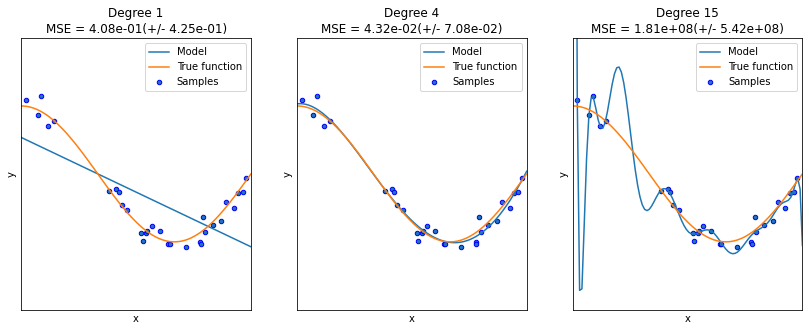

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))


for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

Below is the same code but slightly streamlined using more sklearn modules. 

Namely, I will be using another one of sklearns cross validation modules, this time for model selection.
- GridSearchCV



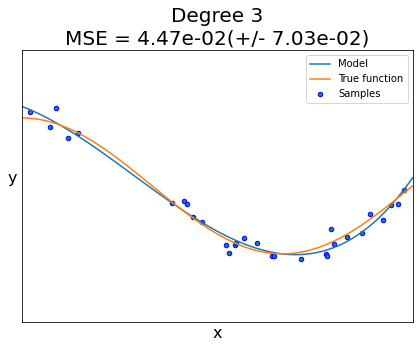

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

'''
First 3 lines just set up the figure for plotting data 
and the fit
'''
plt.figure(figsize=(7, 5))
ax = plt.subplot()
plt.setp(ax, xticks=(), yticks=())

'''
Next we will do 3 things to set up our baseline model with no parameters 
We set up a preprocessing modlue for polynomial fitting
this model transforms 2D data into N-dimensional data 
(depending on the degree passed into the module) via feature expansion...
No dimension specified yet because we want to cross validate 
over this parameter.
Then an instance of our linear regression classifier is create.
Next, the preprocessing module and classifier are put into a pipeline

the pipeline essentially executes the modules and classes parsed into
the pipleline in the order they are listed

'''

polynomial_features = PolynomialFeatures(include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("poly", polynomial_features),
        ("linear", linear_regression),
    ]
)

'''
Now we will set up a cross validation object to find the most optimal
hyperparamaters (i.e degree of linear regressor)

Make a params tuple of the polynomial degrees we want to 
cross validate over.
Then create a dictionary with the key as the parameter we want to
cross validate over, then the parameter values as the key value

using a pipleline adds a little more complexity to cross validation
if you are unsure about the parameter key you can print
pipeline.get_params().keys()

then we create our classifier by calling gridsearchCV and we parse in 
our pipeline and the paramaters we want to validate over
Then we fit our cross validation object and it returns the 
most optimal model

'''
## print(pipeline.get_params().keys())

params = (1,3,4,8,15)
parameters = {'poly__degree':params}
clf = GridSearchCV(pipeline, parameters)
clf.fit(X[:, np.newaxis], y)


'''

similar to the example above we use cross_val_score
this module uses kfold cross validation by default to test 
the model we created

To make it explicit, there are two types of cross validation going on here
the first cross validation uses mutliple models with different parameters
the second cross validation uses the most optimal model and tests over
differnt kfolds of the data

'''

scores = cross_val_score(
    clf, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10,
)

## now we plot the result
plt.plot(X_test, clf.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x",fontsize = 16)
plt.ylabel("y", fontsize = 16, 
           rotation = 'horizontal', labelpad = 10)
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
bestparam = clf.best_params_['poly__degree']

plt.title(
    "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        bestparam, -scores.mean(), scores.std()
    ), fontsize = 20)


plt.show()
